In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
import time
import sys
from def_conv_crs_2h import*
from numpy import*
import time 
from datetime import datetime
from matplotlib.legend_handler import HandlerTuple
#scale=10.58
sep=44.7
IC=1
nucleon='proton'# 'proton','neutron','helium','deuterium','lead'
pdf_name='CT10'# 'NNPDF40'#, 'CT14IC', 'CT10'

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en


In [2]:
df1 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_no_no_def.csv') 
df2 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_no_yes_def.csv')
df3 = pd.read_csv('fit_parameters/dfs_/new_gauss_su_charm_yes_yes_def.csv')

#df1 = pd.read_csv('fit_parameters/dfs_/fit_hadron_coef_0.27_chi_1.174__True_gk_PV17_su_no_charmno.csv')
#df2 = pd.read_csv('fit_parameters/dfs_/fit_hadron_coef_0.27_chi_1.259__True_gk_PV17_su_no_charmyes_correction_no.csv')
#df3 = pd.read_csv('fit_parameters/dfs_/fit_hadron_coef_0.27_chi_1.447__True_gk_PV17_su_yes_charmyes.csv')

chi_min1 = 103.3
chi_min2 = 109.8
chi_min3 = 127.4

df1 = df1.loc[(df1['chi']<chi_min1+15.79)]
df2 = df2.loc[(df2['chi']<chi_min2+17.21)]
df3 = df3.loc[(df3['chi']<chi_min3+15.79)]

nucleon='lead'# 'proton','neutron','helium','deuterium','lead'

pol1 = polarization(0.27,sep)
pol1.g_k = 'PV17'
pol1.mdl_den = 'pwr_lw_star'
pol1.mdl_num = 'gauss'
#pol1.scale =scale
pol1.mass = 1.115
pol1.bmax = 0.6
pol1.charm = 'no'
pol1.nf=3
pol1.IC_num=IC
pol1.pdf_name=pdf_name

pol2 = polarization(0.27,sep)
pol2.g_k = 'PV17'
pol2.mdl_den = 'pwr_lw_star'
pol2.mdl_num = 'gauss'
#pol2.scale =scale
pol2.mass = 1.115
pol2.bmax = 0.6
pol2.charm = 'yes'
pol2.nf=4
pol2.IC_num=IC
pol2.pdf_name=pdf_name

pol3 = polarization(0.27,sep)
pol3.g_k = 'PV17'
pol3.mdl_den = 'pwr_lw_star'
pol3.mdl_num = 'gauss'
#pol3.scale =scale
pol3.mass = 1.115
pol3.bmax = 0.6
pol3.charm = 'yes'
pol3.nf=4
pol3.IC_num=IC
pol3.pdf_name=pdf_name


In [3]:
f_prm1=arange(0.,18.,1.)
f_prm1[0] = df1['NUP'].mean()
f_prm1[1] = df1['NDO'].mean()#par[0]  #do
f_prm1[2] = df1['NST'].mean()  #par[0]      #st
f_prm1[3] = df1['NSEA'].mean()  #par[0]      #upb
f_prm1[4] = f_prm1[3] #par[0]      #dob
f_prm1[5] = f_prm1[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm1[6] = 0 #par[0]      #aup
f_prm1[7] = 0 #par[0]      #ado
f_prm1[8] = df1['AST'].mean()  # par[0]      #ast
f_prm1[9] = 0# par[0]      #aupb
f_prm1[10] = f_prm1[9] #par[0]      #adob
f_prm1[11] = f_prm1[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm1[12] = df1['BUP'].mean() #par[0]      #bup
f_prm1[13] = 0 #par[0]      #bdo
f_prm1[14] = 0# par[0]      #bst
f_prm1[15] = df1['BSEA'].mean() #par[0]      #bupb
f_prm1[16] = f_prm1[15] #par[0]      #bdob
f_prm1[17] = f_prm1[15] # par[0]      #bstb
pp1 = np.float64(df1['PP2'].mean())
#pp=gauss.PP.astype(float)

f_prm2=arange(0.,18.,1.)
f_prm2[0] = df2['NUP'].mean()
f_prm2[1] = df2['NDO'].mean()#par[0]  #do
f_prm2[2] = df2['NST'].mean()  #par[0]      #st
f_prm2[3] = df2['NSEA'].mean()  #par[0]      #upb
f_prm2[4] = f_prm2[3] #par[0]      #dob
f_prm2[5] = f_prm2[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm2[6] = 0 #par[0]      #aup
f_prm2[7] = df2['ADO'].mean() #par[0]      #ado
f_prm2[8] = df2['AST'].mean()  # par[0]      #ast
f_prm2[9] = 0# par[0]      #aupb
f_prm2[10] = f_prm2[9] #par[0]      #adob
f_prm2[11] = f_prm2[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm2[12] = df2['BUP'].mean() #par[0]      #bup
f_prm2[13] = 0 #par[0]      #bdo
f_prm2[14] = 0# par[0]      #bst
f_prm2[15] = df2['BSEA'].mean() #par[0]      #bupb
f_prm2[16] = f_prm2[15] #par[0]      #bdob
f_prm2[17] = f_prm2[15] # par[0]      #bstb
pp2 = np.float64(df2['PP2'].mean())
#pp=gauss.PP.astype(float)

f_prm3=arange(0.,18.,1.)
f_prm3[0] = df3['NUP'].mean()
f_prm3[1] = df3['NUP'].mean()#par[0]  #do
f_prm3[2] = df3['NST'].mean()  #par[0]      #st
f_prm3[3] = df3['NSEA'].mean()  #par[0]      #upb
f_prm3[4] = df3['NSEA'].mean()  #par[0]      #dob
f_prm3[5] = df3['NDO'].mean()  # par[0]      #stb
#¯¯¯¯¯¯
f_prm3[6] = 0 #par[0]      #aup
f_prm3[7] = 0.#par[0]      #ado
f_prm3[8] = df3['AST'].mean()  # par[0]      #ast
f_prm3[9] = 0# par[0]      #aupb
f_prm3[10] = 0.#par[0]      #adob
f_prm3[11] = 0 #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm3[12] = df3['BUP'].mean() #par[0]      #bup
f_prm3[13] = df3['BUP'].mean()  #par[0]      #bdo
f_prm3[14] = 0# par[0]      #bst
f_prm3[15] = 0 #par[0]      #bupb
f_prm3[16] = 0 #par[0]      #bdob
f_prm3[17] = df3['BDO'].mean() # par[0]      #bstb
pp3 = np.float64(df3['PP2'].mean())
#pp=gauss.PP.astype(float)


In [4]:
zs = linspace(0.25,0.7,5)
xb=0.5
y_dwn=0.05
y_up=0.95

In [5]:
def band1(zs1,xb,yy):
    

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    #print("Current Time =", current_time)


    start = time.time()
    pls1=zeros(len(zs1))
    pls11=zeros(len(zs1))
    
    mins_lb1 = zeros(len(zs1))
    maxx_lb1 = zeros(len(zs1))

    mins_lbb1 = zeros(len(zs1))
    maxx_lbb1 = zeros(len(zs1))


    j=0
    for zz in zs1:
        '''
        num_tmp1=zeros(len(df1.NUP))
        num_tmp11=zeros(len(df1.NUP))
        i=0
        for nup, ndo, nst, nsea, ast, bup, bsea, pp in zip(df1.NUP,df1.NDO,df1.NST,df1.NSEA,df1.AST,df1.BUP,df1.BSEA,df1.PP2):



            f_prm=arange(0.,18.,1.)
            f_prm[0] = nup
            f_prm[1] = ndo#par[0]  #do
            f_prm[2] = nst  #par[0]      #st
            f_prm[3] = nsea  #par[0]      #upb
            f_prm[4] = f_prm[3] #par[0]      #dob
            f_prm[5] = f_prm[3] # par[0]      #stb
            #¯¯¯¯¯¯
            f_prm[6] = 0 #par[0]      #aup
            f_prm[7] = 0 #par[0]      #ado
            f_prm[8] = ast  # par[0]      #ast
            f_prm[9] = 0# par[0]      #aupb
            f_prm[10] = f_prm[9] #par[0]      #adob
            f_prm[11] = f_prm[9] #par[0]      #astb
            #¯#¯¯¯¯¯¯¯
            f_prm[12] = bup #par[0]      #bup
            f_prm[13] = 0 #par[0]      #bdo
            f_prm[14] = 0# par[0]      #bst
            f_prm[15] = bsea #par[0]      #bupb
            f_prm[16] = f_prm[15] #par[0]      #bdob
            f_prm[17] = f_prm[15] # par[0]      #bstb
            pt_pp=pp
            #print(pt_pp)
            #mss = 0# float(df['MSS'])

            num_tmp1[i] = pol1.ratio('lbd','PP',zz,xb,f_prm,pp,0.)
            num_tmp11[i] = pol1.ratio('lbd_b','PP',zz,xb,f_prm,pp,0.)

            i+=1
        mins_lb1[j] = min(num_tmp1)
        maxx_lb1[j] = max(num_tmp1)
        mins_lbb1[j] = min(num_tmp11)
        maxx_lbb1[j] = max(num_tmp11)
        '''
        pls1[j]= pol1.ratio_y('lbd',nucleon,zz,xb,yy,f_prm1,pp1,0.)
        pls11[j]= pol1.ratio_y('lbd_b',nucleon,zz,xb,yy,f_prm1,pp1,0.)
        #print(mins_lb1)
        j+=1
    #dati_lp['mins']	= mins_lp
    #dati_lp['maxx']	= maxx_lp

    #return pls1,mins_lb1,maxx_lb1,pls11,mins_lbb1,maxx_lbb1
    return pls1,pls11

In [6]:
def band2(zs1,xb,yy):
    

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    #print("Current Time =", current_time)


    start = time.time()
    pls2=zeros(len(zs1))
    pls22=zeros(len(zs1))

    mins_lb2 = zeros(len(zs1))
    maxx_lb2 = zeros(len(zs1))

    mins_lbb2 = zeros(len(zs1))
    maxx_lbb2 = zeros(len(zs1))


    j=0
    for zz in zs1:

        num_tmp1=zeros(len(df2.NUP))
        num_tmp11=zeros(len(df2.NUP))
        '''
        i=0
        for nup, ndo, nst, nsea, ado,ast, bup, bsea, pp in zip(df2.NUP,df2.NDO,df2.NST,df2.NSEA,df2.ADO,df2.AST,df2.BUP,df2.BSEA,df2.PP2):

            f_prm=arange(0.,18.,1.)
            f_prm[0] = nup
            f_prm[1] = ndo#par[0]  #do
            f_prm[2] = nst  #par[0]      #st
            f_prm[3] = nsea  #par[0]      #upb
            f_prm[4] = f_prm[3] #par[0]      #dob
            f_prm[5] = f_prm[3] # par[0]      #stb
            #¯¯¯¯¯¯
            f_prm[6] = 0 #par[0]      #aup
            f_prm[7] = ado #par[0]      #ado
            f_prm[8] = ast  # par[0]      #ast
            f_prm[9] = 0# par[0]      #aupb
            f_prm[10] = f_prm[9] #par[0]      #adob
            f_prm[11] = f_prm[9] #par[0]      #astb
            #¯#¯¯¯¯¯¯¯
            f_prm[12] = bup #par[0]      #bup
            f_prm[13] = 0 #par[0]      #bdo
            f_prm[14] = 0# par[0]      #bst
            f_prm[15] = bsea #par[0]      #bupb
            f_prm[16] = f_prm[15] #par[0]      #bdob
            f_prm[17] = f_prm[15] # par[0]      #bstb
            pt_pp=pp
            #print(pt_pp)
            #mss = 0# float(df['MSS'])

            num_tmp1[i] = pol2.ratio('lbd','PP',zz,xb,f_prm,pp,0.)
            num_tmp11[i] = pol2.ratio('lbd_b','PP',zz,xb,f_prm,pp,0.)

            i+=1
        mins_lb2[j] = min(num_tmp1)
        maxx_lb2[j] = max(num_tmp1)
        mins_lbb2[j] = min(num_tmp11)
        maxx_lbb2[j] = max(num_tmp11)
        '''
        pls2[j]= pol2.ratio_y('lbd',nucleon,zz,xb,yy,f_prm2,pp2,0)
        pls22[j]= pol2.ratio_y('lbd_b',nucleon,zz,xb,yy,f_prm2,pp2,0)

        #print(mins_lb2)
        j+=1
    #dati_lp['mins']	= mins_lp
    #dati_lp['maxx']	= maxx_lp

    #return pls2,mins_lb2,maxx_lb2,pls22,mins_lbb2,maxx_lbb2
    return pls2,pls22

In [7]:
def band3(zs1,xb,yy):

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    #print("Current Time =", current_time)


    start = time.time()
    pls3=zeros(len(zs1))
    pls33=zeros(len(zs1))


    mins_lb3 = zeros(len(zs1))
    maxx_lb3 = zeros(len(zs1))

    mins_lbb3 = zeros(len(zs1))
    maxx_lbb3 = zeros(len(zs1))


    j=0
    for zz in zs1:

        num_tmp1=zeros(len(df3.NUP))
        num_tmp11=zeros(len(df3.NUP))
        '''
        i=0
        for nup, ndo, nst, nsea, ast, bup, bdo, pp in zip(df3.NUP,df3.NDO,df3.NST,df3.NSEA,df3.AST,df3.BUP,df3.BDO,df3.PP2):

            f_prm=arange(0.,18.,1.)
            f_prm[0] = nup
            f_prm[1] = nup#par[0]  #do
            f_prm[2] = nst  #par[0]      #st
            f_prm[3] = nsea  #par[0]      #upb
            f_prm[4] = nsea #par[0]      #dob
            f_prm[5] = ndo # par[0]      #stb
            #¯¯¯¯¯¯
            f_prm[6] = 0 #par[0]      #aup
            f_prm[7] = 0.      #ado
            f_prm[8] = ast  # par[0]      #ast
            f_prm[9] = 0# par[0]      #aupb
            f_prm[10] = 0 #par[0]      #adob
            f_prm[11] =0 #par[0]      #astb
            #¯#¯¯¯¯¯¯¯
            f_prm[12] = bup #par[0]      #bup
            f_prm[13] = bup #par[0]      #bdo
            f_prm[14] = 0# par[0]      #bst
            f_prm[15] = 0 #par[0]      #bupb
            f_prm[16] = 0 #par[0]      #bdob
            f_prm[17] = bdo # par[0]      #bstb
            pt_pp=pp
            #print(pt_pp)
            #mss = 0# float(df['MSS'])

            num_tmp1[i] = pol3.ratio('lbd','PP',zz,xb,f_prm,pp,0.)
            num_tmp11[i] = pol3.ratio('lbd_b','PP',zz,xb,f_prm,pp,0.)

            i+=1
        mins_lb3[j] = min(num_tmp1)
        maxx_lb3[j] = max(num_tmp1)
        mins_lbb3[j] = min(num_tmp11)
        maxx_lbb3[j] = max(num_tmp11)
        '''
        pls3[j]= pol3.ratio_y('lbd',nucleon,zz,xb,yy,f_prm3,pp3,0)
        pls33[j]= pol3.ratio_y('lbd_b',nucleon,zz,xb,yy,f_prm3,pp3,0)
        
        
        #print(mins_lb3)
        j+=1
    #dati_lp['mins']	= mins_lp
    #dati_lp['maxx']	= maxx_lp

    #return pls3,mins_lb3,maxx_lb3,pls33,mins_lbb3,maxx_lbb3
    return pls3,pls33

In [8]:
zs = linspace(0.3,0.75,10)
xbs=[0.15,0.25,.35,.45,.6]
xbs=[0.05,0.15,0.25,.35,.45,.6]

#xbs=[0.5,.05,.005,.001]

y_lbl=50
x_lbl =50
yy=0.5
y_dwn=0.05
y_up=0.95
limx=[0.15,0.8]
ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione linea fit

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000


/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPD

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

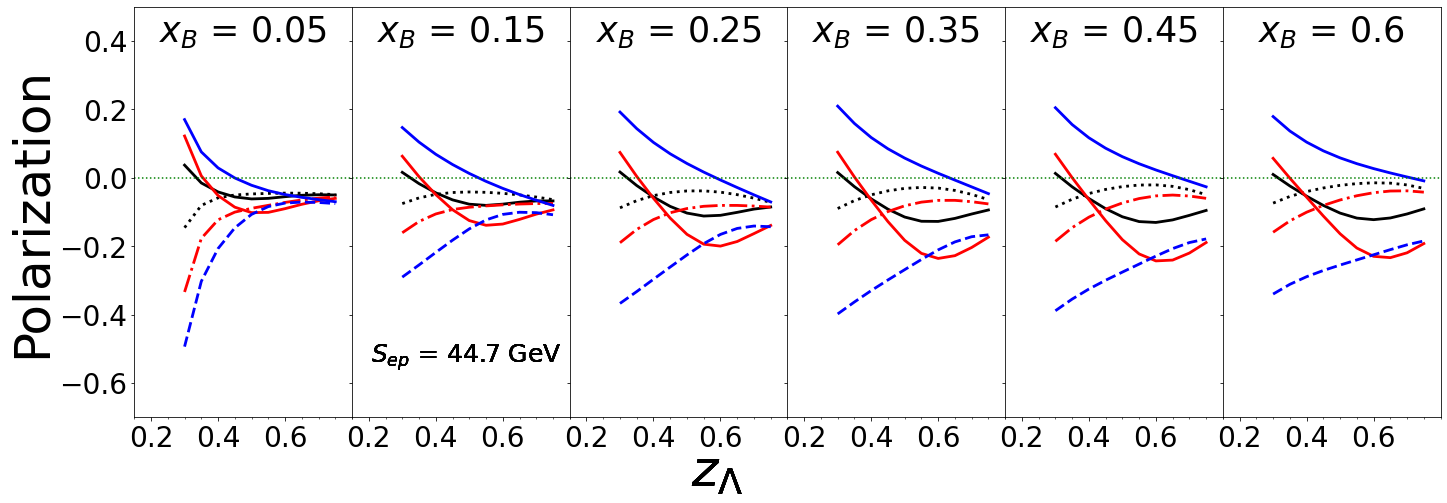

In [9]:

ct=1
lim=[-0.7,0.5]
fig, axes = plt.subplots(1,len(xbs))
for xb,ax in zip(xbs,axes):
    ax=plt.subplot(1,len(xbs),ct)
    ###   reference lines
    if sep==28.6:
        if xb!=0.05:
            bd1=band1(zs,xb,yy)
            p1=ax.plot(zs,bd1[0],label='$\Lambda$ (1)',linestyle='solid',linewidth=fit_l-0.2,color='black')
            p11=ax.plot(zs,bd1[1],label='$\overline{\Lambda}$ (1)',linestyle='dotted',linewidth=fit_l-0.2,color='black')

            #ax.fill_between(zs,band1(zs,xb)[2],band1(zs,xb)[1],facecolor='grey', alpha=0.2)
            #ax.fill_between(zs,band1(zs,xb)[5],band1(zs,xb)[4],facecolor='grey', alpha=0.2)


            bd2=band2(zs,xb,yy)
            p2=ax.plot(zs,bd2[0],label='$\Lambda$  (2)',linestyle='solid',linewidth=fit_l-0.2,color='red')
            p22=ax.plot(zs,bd2[1],label='$\overline{\Lambda}$ (2)',linestyle='-.',linewidth=fit_l-0.2,color='red')

            bd3=band3(zs,xb,yy)
            p3=ax.plot(zs,bd3[0],label='$\Lambda$ (3)',linestyle='solid',linewidth=fit_l-0.2,color='blue')
            p33= ax.plot(zs,bd3[1],label='$\overline{\Lambda}$ (3)',linestyle='--',linewidth=fit_l-0.2,color='blue')
    elif sep!=28.6:
        bd1=band1(zs,xb,yy)
        ax.plot(zs,bd1[0],label='$\Lambda$ (1)',linestyle='solid',linewidth=fit_l-0.2,color='black')
        ax.plot(zs,bd1[1],label='$\overline{\Lambda}$ (1)',linestyle='dotted',linewidth=fit_l-0.2,color='black')

        #ax.fill_between(zs,band1(zs,xb)[2],band1(zs,xb)[1],facecolor='grey', alpha=0.2)
        #ax.fill_between(zs,band1(zs,xb)[5],band1(zs,xb)[4],facecolor='grey', alpha=0.2)


        bd2=band2(zs,xb,yy)
        ax.plot(zs,bd2[0],label='$\Lambda$  (2)',linestyle='solid',linewidth=fit_l-0.2,color='red')
        ax.plot(zs,bd2[1],label='$\overline{\Lambda}$ (2)',linestyle='-.',linewidth=fit_l-0.2,color='red')

        bd3=band3(zs,xb,yy)
        ax.plot(zs,bd3[0],label='$\Lambda$ (3)',linestyle='solid',linewidth=fit_l-0.2,color='blue')
        ax.plot(zs,bd3[1],label='$\overline{\Lambda}$ (3)',linestyle='--',linewidth=fit_l-0.2,color='blue')
         
    
    axhline(linewidth=1.5, ls=':', color='g')

    title("$x_B$ = "+str(xb),fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.25: title("0.2<$x_B$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.35: title("0.3<$x_B$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.45: title("0.4<$x_B$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.6: title("0.5<$x_B$<0.9 ",fontsize=title_s,x=0.5, y=.9)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.set_xticks([0.2,0.4,0.6])
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    if ct >1: ax.set_yticklabels([])

    if sep==140.7:
        if ct==6:ax.legend(bbox_to_anchor=(1.,1.),fontsize=30,frameon=True,framealpha=1) 
        #if ct==2:ax.legend([(p1,p11),(p2,p22),(p3,p33)],['$\Lambda$ (1)','$\Lambda$ (2)','$\Lambda$ (3)'],bbox_to_anchor=(0.1,.5),fontsize=27,frameon=True,framealpha=1) 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ax.set_xlim(limx)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.33, 0.28, '$S_{ep}$ = '+str(sep)+' GeV', ha='center',size=25)
    #fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(20.5, 9.5, forward=False)
#fig.savefig('Lb_prot_scale_'+str(sep)+'xB.png',bbox_inches='tight')
#fig.savefig('plot_draft/Lb_prot_scale_'+str(sep)+'xB.pdf',bbox_inches='tight')
#fig.savefig('plot_draft/Lb_prot_scale_'+str(sep)+'xB.png',bbox_inches='tight')



In [10]:
len(xbs)

6

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPD

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPD

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPD

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

/home/marco/Documenti/SIDIS_epem/def_convolution_sidis_PV17_beam_en/Sudakov/sudakov_factor.py:75: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar*((1-np.exp(-bt**4/bm**4))**(1/4))/(1-np.exp(-bt**4/bmin**4))**(1/4)


LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/CT10nlo/CT

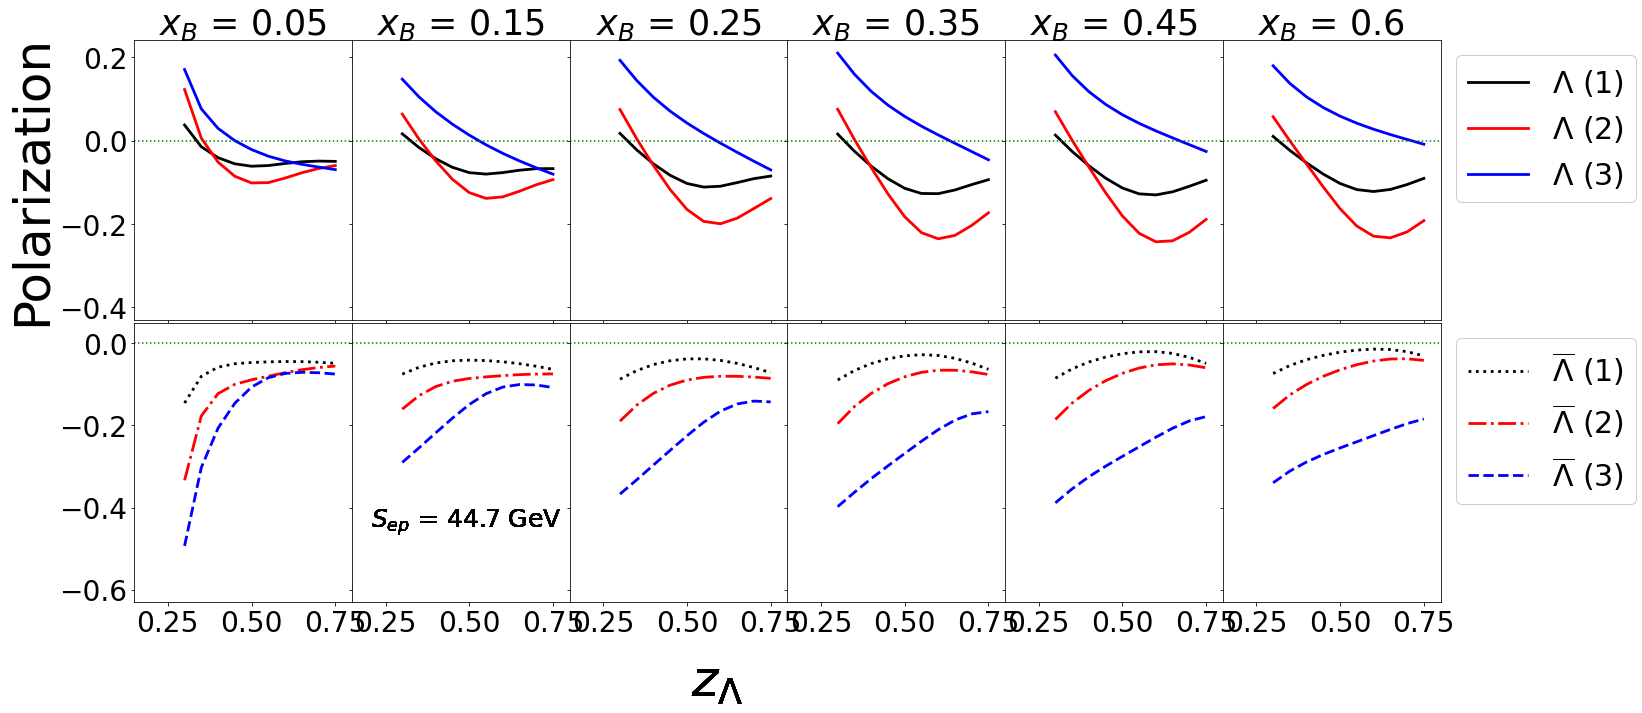

In [11]:
xbs=[0.05,0.15,0.25,.35,.45,.6,0.05,0.15,0.25,.35,.45,.6]
limx=[0.15,0.8]
limy1=[-0.43,0.24]
limy2=[-0.63,0.05]
ct=1
lim=[-0.7,0.5]
fig, axes = plt.subplots(1,len(xbs))
for xb,ax in zip(xbs,axes):
    ax=plt.subplot(2,6,ct)
    ###   reference lines
    if sep==28.6:
        if xb!=0.05:
            if ct<=6:
                bd1=band1(zs,xb,yy)
                p1=ax.plot(zs,bd1[0],label='$\Lambda$ (1)',linestyle='solid',linewidth=fit_l-0.2,color='black')
                bd2=band2(zs,xb,yy)
                p2=ax.plot(zs,bd2[0],label='$\Lambda$ (2)',linestyle='solid',linewidth=fit_l-0.2,color='red')
                bd3=band3(zs,xb,yy)
                p3=ax.plot(zs,bd3[0],label='$\Lambda$ (3)',linestyle='solid',linewidth=fit_l-0.2,color='blue')
                title("$x_B$ = "+str(xb),fontsize=title_s,x=0.5, y=1)
                if ct >1: ax.set_yticklabels([])
                ax.set_xticklabels([])
                ax.set_ylim(limy1)
            elif ct>6:
                bd1=band1(zs,xb,yy)
                bd2=band2(zs,xb,yy)
                bd3=band3(zs,xb,yy)
                p11=ax.plot(zs,bd1[1],label='$\overline{\Lambda}$ (1)',linestyle='dotted',linewidth=fit_l-0.2,color='black')
                p22=ax.plot(zs,bd2[1],label='$\overline{\Lambda}$ (2)',linestyle='-.',linewidth=fit_l-0.2,color='red')
                p33= ax.plot(zs,bd3[1],label='$\overline{\Lambda}$ (3)',linestyle='--',linewidth=fit_l-0.2,color='blue')
                if ct >7: ax.set_yticklabels([])
                ax.set_ylim(limy2)
                
    elif sep!=28.6:
        if ct<=6:
            bd1=band1(zs,xb,yy)
            p1=ax.plot(zs,bd1[0],label='$\Lambda$ (1)',linestyle='solid',linewidth=fit_l-0.2,color='black')
            bd2=band2(zs,xb,yy)
            p2=ax.plot(zs,bd2[0],label='$\Lambda$ (2)',linestyle='solid',linewidth=fit_l-0.2,color='red')
            bd3=band3(zs,xb,yy)
            p3=ax.plot(zs,bd3[0],label='$\Lambda$ (3)',linestyle='solid',linewidth=fit_l-0.2,color='blue')
            title("$x_B$ = "+str(xb),fontsize=title_s,x=0.5, y=1)
            if ct >1: ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_ylim(limy1)

        elif ct>6:
            bd1=band1(zs,xb,yy)
            bd2=band2(zs,xb,yy)
            bd3=band3(zs,xb,yy)
            p11=ax.plot(zs,bd1[1],label='$\overline{\Lambda}$ (1)',linestyle='dotted',linewidth=fit_l-0.2,color='black')
            p22=ax.plot(zs,bd2[1],label='$\overline{\Lambda}$ (2)',linestyle='-.',linewidth=fit_l-0.2,color='red')
            p33= ax.plot(zs,bd3[1],label='$\overline{\Lambda}$ (3)',linestyle='--',linewidth=fit_l-0.2,color='blue')
            if ct >7: ax.set_yticklabels([])
            ax.set_ylim(limy2)
                
            #ax.set_xticklabels([0.3,0.5,0.7])
    axhline(linewidth=1.5, ls=':', color='g')

    
    #if xb == 0.25: title("0.2<$x_B$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.35: title("0.3<$x_B$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.45: title("0.4<$x_B$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    #if xb == 0.6: title("0.5<$x_B$<0.9 ",fontsize=title_s,x=0.5, y=.9)
    ax.tick_params(axis='both', which='major', labelsize=28)
    #ax.set_xticks([0.2,0.4,0.6])
    #ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    #if ct >1: ax.set_yticklabels([])
    if ct==6:ax.legend(bbox_to_anchor=(1.,1.),fontsize=30,frameon=True,framealpha=1) 
    if ct==12:ax.legend(bbox_to_anchor=(1.,1.),fontsize=30,frameon=True,framealpha=1)         
    if sep==140.7:
        if ct==6:ax.legend(bbox_to_anchor=(1.,1.),fontsize=30,frameon=True,framealpha=1) 
        #if ct==2:ax.legend([(p1,p11),(p2,p22),(p3,p33)],['$\Lambda$ (1)','$\Lambda$ (2)','$\Lambda$ (3)'],bbox_to_anchor=(0.1,.5),fontsize=27,frameon=True,framealpha=1) 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ax.set_xlim(limx)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.33, 0.28, '$S_{ep}$ = '+str(sep)+' GeV', ha='center',size=25)
    #fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.01,wspace=0.0)
fig.set_size_inches(20.5, 13, forward=False)
#fig.savefig('Lb_prot_scale_'+str(sep)+'xB.png',bbox_inches='tight')
#fig.savefig('plot_draft/Lb_prot_scale_'+str(sep)+'xB.pdf',bbox_inches='tight')
#fig.savefig('plot_draft/Lb_prot_scale_'+str(sep)+'xB.png',bbox_inches='tight')

